In [ ]:
%pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Documents importants/Academic/MIT/Fall/15_572_Analytics_lab/Google Colab - ALab/Notebooks/src')

In [ ]:
from utils import *
from nlp_utils import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# automatically refresh imported modules
%reload_ext autoreload
%autoreload 2

## for data
import json
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## for explainer
from lime import lime_text

## for word embedding
import gensim
import gensim.downloader as gensim_api
from sklearn import metrics

In [ ]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [ ]:
path = '/content/drive/MyDrive/Documents importants/Academic/MIT/Fall/15_572_Analytics_lab/Google Colab - ALab/Data/ML_NOAC_NOVA_Extraction_Cleaned_DF3_Full.csv'
df = pd.read_csv(path)


# Email Object

We are using a RandomForest Classifier to classify the final class using the desired variable.

In [ ]:
## EmailObject
var_used = "EmailObject"
df = df[['Type', var_used]]

# Remove stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")
df[var_used] = df[var_used].progress_apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

100%|██████████| 251234/251234 [00:10<00:00, 23006.29it/s]


In [ ]:
## split dataset
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 1, stratify = df["Type"])

## get target
y_train = df_train["Type"].values
y_test = df_test["Type"].values

In [ ]:
# vectorize Data
vectorizer, X_train = initVectorizer(df_train, var_used) ;

# pipeline
classifier = RandomForestClassifier(verbose=1)
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),  
                              ("classifier", classifier)])

## train classifier
model_rf["classifier"].fit(X_train, y_train)

# 0:
  . selected features: 4565
  . top features: 20220301,20220302,20220303,20220304,20220307,20220308,20220309,20220310,20220315,20220325
 
# 1:
  . selected features: 4565
  . top features: 20220301,20220302,20220303,20220304,20220307,20220308,20220309,20220310,20220315,20220325
 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.6min finished


RandomForestClassifier(verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


Probability Threshold:  0.4492894670688788
Accuracy: 0.78
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     17135
           1       0.70      0.52      0.60      7989

    accuracy                           0.78     25124
   macro avg       0.75      0.71      0.72     25124
weighted avg       0.77      0.78      0.77     25124



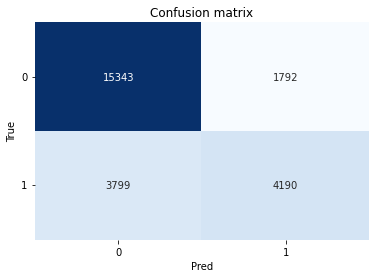

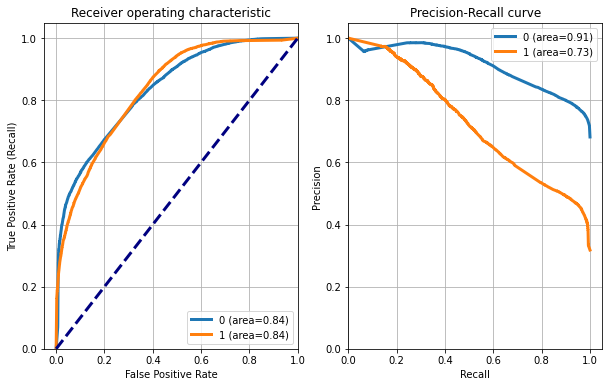

In [ ]:
X_test = df_test[var_used].values
predicted = model_rf.predict(X_test)
predicted_prob = model_rf.predict_proba(X_test)
performance_report(y_test, predicted_prob, 0.7)

In [ ]:
X = df[var_used].values
EmailObjectPreds = model_rf.predict_proba(X)[:,1] > 0.4492894670688788

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.5s finished


# LastEmailContent


In [ ]:
df = pd.read_csv(path)

## EmailObject
var_used = "LastEmailContent"
df = df[['Type', var_used]]

# Remove stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")
df[var_used] = df[var_used].progress_apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

100%|██████████| 251234/251234 [01:46<00:00, 2368.94it/s]


In [ ]:
## split dataset
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 1, stratify = df["Type"])

## get target
y_train = df_train["Type"].values
y_test = df_test["Type"].values

In [ ]:
# vectorize Data
vectorizer, X_train = initVectorizer(df_train, var_used) ;

# pipeline
classifier = RandomForestClassifier(verbose=1)
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),  
                              ("classifier", classifier)])

## train classifier
model_rf["classifier"].fit(X_train, y_train)

# 0:
  . selected features: 4647
  . top features: add line,adding,address,advise im,advise proceed,airoli,airoli india,airoli knowledge,america,america import
 
# 1:
  . selected features: 4647
  . top features: add line,adding,address,advise im,advise proceed,airoli,airoli india,airoli knowledge,america,america import
 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 32.4min finished


RandomForestClassifier(verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


Probability Threshold:  0.5085000000000001
Accuracy: 0.77
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     17135
           1       0.70      0.50      0.59      7989

    accuracy                           0.77     25124
   macro avg       0.75      0.70      0.71     25124
weighted avg       0.76      0.77      0.76     25124



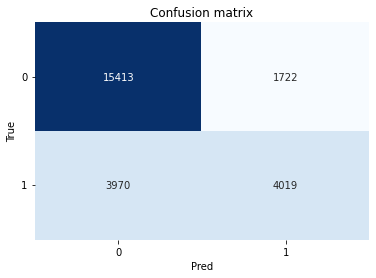

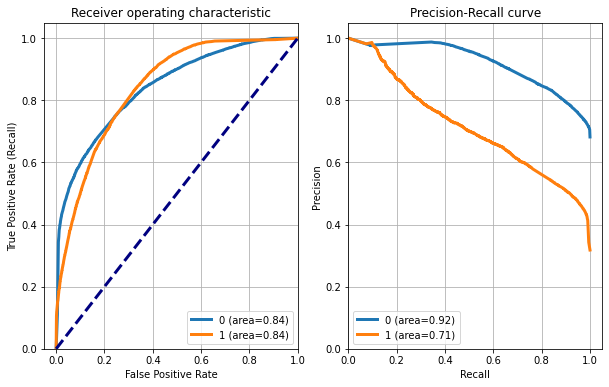

In [ ]:
X_test = df_test[var_used].values
predicted = model_rf.predict(X_test)
predicted_prob = model_rf.predict_proba(X_test)
performance_report(y_test, predicted_prob, 0.7)

In [ ]:
X = df[var_used].values
LastEmailContentPreds = model_rf.predict_proba(X)[:,1] > 0.5085000000000001

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.4s finished


# Team Name

In [ ]:
df = pd.read_csv(path)

df["TeamName"] = df["TeamName"].str.replace("-", " ")

## EmailObject
var_used = "TeamName"
df = df[['Type', var_used]]

# Remove stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")
df[var_used] = df[var_used].progress_apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))


100%|██████████| 251234/251234 [00:10<00:00, 23436.36it/s]


In [ ]:
## split dataset
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 1, stratify = df["Type"])

## get target
y_train = df_train["Type"].values
y_test = df_test["Type"].values

In [ ]:
# vectorize Data
vectorizer, X_train = initVectorizer(df_train, var_used) ;

# pipeline
classifier = RandomForestClassifier(verbose=1)
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),  
                              ("classifier", classifier)])

## train classifier
model_rf["classifier"].fit(X_train, y_train)

# 0:
  . selected features: 385
  . top features: 3m,abinbev,adidas,anl exp,anl imp,apex,auto,bkg,bkg auto,bkg elite
 
# 1:
  . selected features: 385
  . top features: 3m,abinbev,adidas,anl exp,anl imp,apex,auto,bkg,bkg auto,bkg elite
 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


Probability Threshold:  0.5720812706326095
Accuracy: 0.74
Auc: 0.8
Detail:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     17135
           1       0.74      0.28      0.40      7989

    accuracy                           0.74     25124
   macro avg       0.74      0.61      0.62     25124
weighted avg       0.74      0.74      0.70     25124



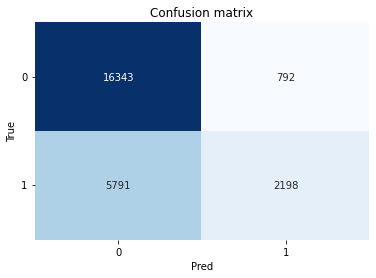

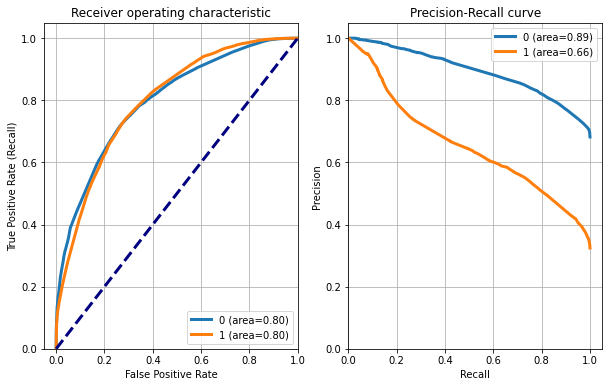

In [ ]:
X_test = df_test[var_used].values
predicted = model_rf.predict(X_test)
predicted_prob = model_rf.predict_proba(X_test)
performance_report(y_test, predicted_prob, 0.7)

In [ ]:
X = df[var_used].values
TeamNamePreds = model_rf.predict_proba(X)[:,1] > 0.5720812706326095

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.7s finished


# ContactEmail_Last and EmailCCAddress

In [ ]:
df = pd.read_csv(path)

df["ContactEmail"] = df["ContactEmail"].str.replace("@", " ")
df["ContactEmail"] = df["ContactEmail"].str.replace(".", " ")
df["ContactEmail"] = df["ContactEmail"].str.replace("_", " ")
df["ContactEmail"] = df["ContactEmail"].str.replace("-", " ")
df["LastEmailCCAddress"] = df["LastEmailCCAddress"].str.replace("@", " ")
df["LastEmailCCAddress"] = df["LastEmailCCAddress"].str.replace(".", " ")
df["LastEmailCCAddress"] = df["LastEmailCCAddress"].str.replace("_", " ")
df["LastEmailCCAddress"] = df["LastEmailCCAddress"].str.replace("-", " ")
df["Emails"] = df["ContactEmail"] + df["LastEmailCCAddress"]

## EmailObject
var_used = "Emails"
df = df[['Type', var_used]]

# Remove stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")
df[var_used] = df[var_used].progress_apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

100%|██████████| 251234/251234 [00:24<00:00, 10340.21it/s]


In [ ]:
## split dataset
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 1, stratify = df["Type"])

## get target
y_train = df_train["Type"].values
y_test = df_test["Type"].values

In [ ]:
# vectorize Data
vectorizer, X_train = initVectorizer(df_train, var_used) ;

# pipeline
classifier = RandomForestClassifier(verbose=1)
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),  
                              ("classifier", classifier)])

## train classifier
model_rf["classifier"].fit(X_train, y_train)

# 0:
  . selected features: 4358
  . top features: amacri,amacri anlusa,anlusa,anlusa com,aperkins,aperkins usa,apl,bdpint,bdpint comusa,bizintelligence
 
# 1:
  . selected features: 4358
  . top features: amacri,amacri anlusa,anlusa,anlusa com,aperkins,aperkins usa,apl,bdpint,bdpint comusa,bizintelligence
 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.4min finished


RandomForestClassifier(verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


Probability Threshold:  0.43168103865475616
Accuracy: 0.78
Auc: 0.78
Detail:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     17135
           1       0.70      0.51      0.59      7989

    accuracy                           0.78     25124
   macro avg       0.75      0.71      0.72     25124
weighted avg       0.77      0.78      0.76     25124



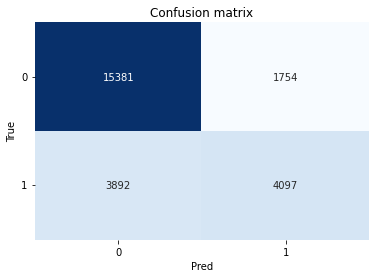

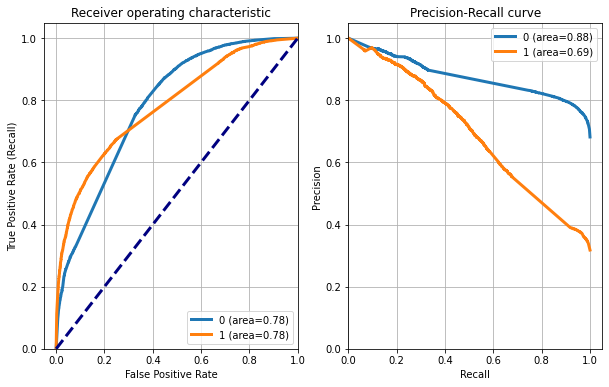

In [ ]:
X_test = df_test[var_used].values
predicted = model_rf.predict(X_test)
predicted_prob = model_rf.predict_proba(X_test)
performance_report(y_test, predicted_prob, 0.7)

In [ ]:
X = df[var_used].values
EmailsPreds = model_rf.predict_proba(X)[:,1] > 0.43168103865475616

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.9s finished


# EXPORT

In [ ]:
df = pd.read_csv(path)

results = df[["CaseNumber"]]
results["EmailObjectPreds"] = EmailObjectPreds
results["LastEmailContentPreds"] = LastEmailContentPreds
results["TeamNamePreds"] = TeamNamePreds
results["EmailsPreds"] = EmailsPreds

In [ ]:
results.head()

,CaseNumber,EmailObjectPreds,LastEmailContentPreds,TeamNamePreds,EmailsPreds
0,100124562,False,False,False,False
1,100080371,True,False,True,False
2,100095395,True,False,False,False
3,100097054,False,False,False,False
4,100097055,False,False,False,False


In [ ]:
save_path = '/content/drive/MyDrive/Documents importants/Academic/MIT/Fall/15_572_Analytics_lab/Google Colab - ALab/Data/NEW_FEATURES_BABYYYY.csv'

results.to_csv(
    save_path,
    index=False,
)

In [ ]:
results["Type"] = df["Type"]
results.head()

,CaseNumber,EmailObjectPreds,LastEmailContentPreds,TeamNamePreds,EmailsPreds,Type
0,100124562,False,False,False,False,0
1,100080371,True,False,True,False,0
2,100095395,True,False,False,False,0
3,100097054,False,False,False,False,0
4,100097055,False,False,False,False,0


In [ ]:
vars = ['LastEmailCCAddressCount', 'CMA_in_cc', 'CountMailsInConversation']
for v in vars:
  results[v] = df[v]

In [ ]:
xx.head()

,EmailObjectPreds,LastEmailContentPreds,TeamNamePreds,EmailsPreds,Type,LastEmailCCAddressCount,CMA_in_cc,CountMailsInConversation
0,False,False,False,False,0,1,False,7
1,True,False,True,False,0,5,True,4
2,True,False,False,False,0,1,False,3
3,False,False,False,False,0,1,True,2
4,False,False,False,False,0,0,False,2


In [ ]:
xx = results.drop("CaseNumber", axis=1)

train, test = train_test_split(xx, test_size = 0.1, random_state = 1, stratify = xx["Type"])

x_train = train[['EmailObjectPreds', 'LastEmailContentPreds', 'TeamNamePreds', 'EmailsPreds']]
x_test = test[['EmailObjectPreds', 'LastEmailContentPreds', 'TeamNamePreds', 'EmailsPreds']]
y_train = train["Type"]
y_test = test["Type"]

In [ ]:
rfc = RandomForestClassifier(verbose=1)

rfc.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.3s finished


RandomForestClassifier(verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


Probability Threshold:  0.29202608530158103
Accuracy: 0.8
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     17135
           1       0.70      0.65      0.67      7989

    accuracy                           0.80     25124
   macro avg       0.77      0.76      0.76     25124
weighted avg       0.80      0.80      0.80     25124



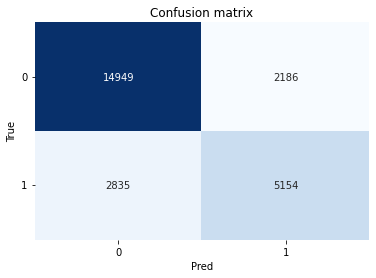

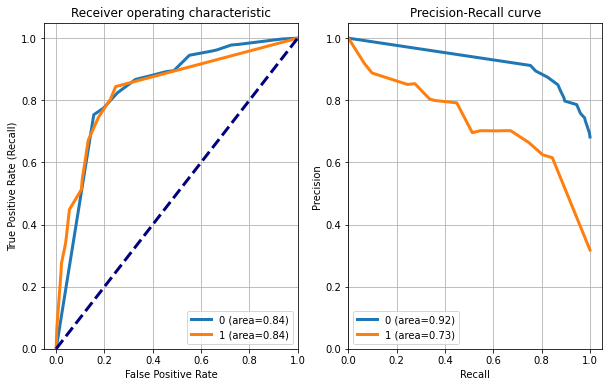

In [ ]:
predicted = rfc.predict(x_test)
predicted_prob = rfc.predict_proba(x_test)

performance_report(y_test, predicted_prob, 0.7)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_para = {'max_depth':range(3,10,2),
             'n_estimators': [100, 200, 500, 1000],
              'min_samples_split': [2, 5],
              }

  # define the model
gridSearch = GridSearchCV(RandomForestClassifier(random_state = 1, n_jobs = -1), rf_para, cv=5, verbose = 2)
gridSearch.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   6.8s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   6.7s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=500; total time=  16.2s
[CV] END .max_depth=3, min_samples_split=2, n_e

KeyboardInterrupt: ignored

In [ ]:
gridSearch.best_params_

In [ ]:
rfc1 = RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 500, max_depth=8)
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=1)

Probability Threshold:  0.29246465598180643
Accuracy: 0.8
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     17135
           1       0.70      0.65      0.67      7989

    accuracy                           0.80     25124
   macro avg       0.77      0.76      0.76     25124
weighted avg       0.80      0.80      0.80     25124



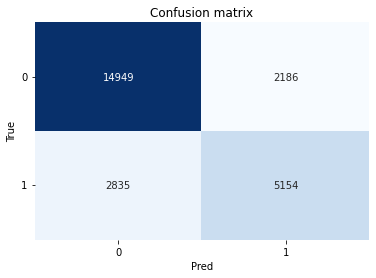

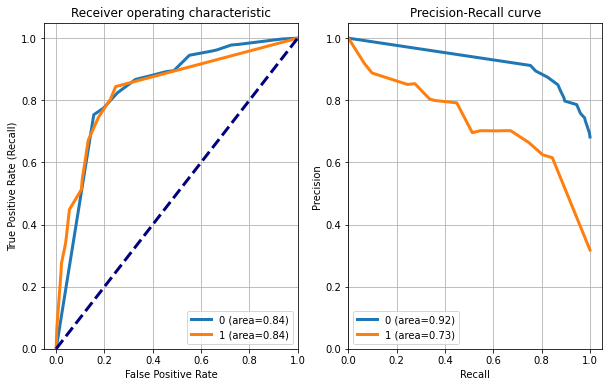

In [ ]:
predicted = rfc1.predict(x_test)
predicted_prob = rfc1.predict_proba(x_test)

performance_report(y_test, predicted_prob, 0.7)

# Naive Classifier

In [ ]:
classifier = LogisticRegression(random_state=0)

## train classifier
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

Probability Threshold:  0.25319206848602727
Accuracy: 0.8
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     17135
           1       0.70      0.65      0.67      7989

    accuracy                           0.80     25124
   macro avg       0.77      0.76      0.76     25124
weighted avg       0.80      0.80      0.80     25124



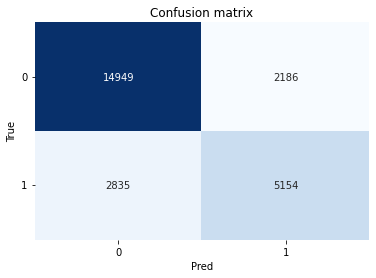

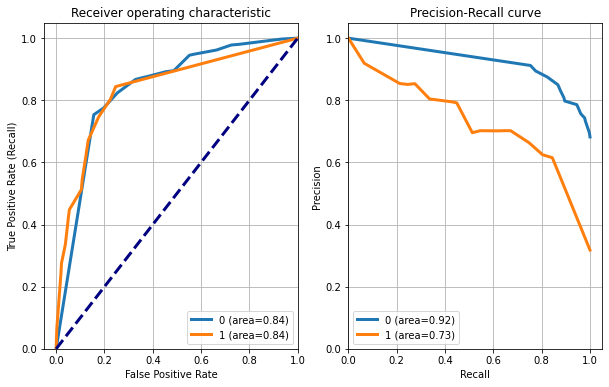

In [ ]:
predicted = classifier.predict(x_test)
predicted_prob = classifier.predict_proba(x_test)

performance_report(y_test, predicted_prob, 0.7)